In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

import winsound

Using TensorFlow backend.


In [2]:
df = pd.read_csv('dataset.csv')
del df['Unnamed: 0']

In [3]:
df

,date,number,name,div,a
0,2008-01-01,150.0,서울역(150),승차,234.0
1,2008-01-01,150.0,서울역(150),승차,-420.0
2,2008-01-01,150.0,서울역(150),승차,-318.0
3,2008-01-01,150.0,서울역(150),승차,-161.0
4,2008-01-01,150.0,서울역(150),승차,-205.0
5,2008-01-01,150.0,서울역(150),승차,13.0
6,2008-01-01,150.0,서울역(150),승차,538.0
7,2008-01-01,150.0,서울역(150),승차,632.0
8,2008-01-01,150.0,서울역(150),승차,604.0
9,2008-01-01,150.0,서울역(150),승차,808.0


In [4]:
df.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [5]:
df['name']

0           서울역(150)
1           서울역(150)
2           서울역(150)
3           서울역(150)
4           서울역(150)
5           서울역(150)
6           서울역(150)
7           서울역(150)
8           서울역(150)
9           서울역(150)
10          서울역(150)
11          서울역(150)
12          서울역(150)
13          서울역(150)
14          서울역(150)
15          서울역(150)
16          서울역(150)
17          서울역(150)
18          서울역(150)
19          서울역(150)
20           시청(151)
21           시청(151)
22           시청(151)
23           시청(151)
24           시청(151)
25           시청(151)
26           시청(151)
27           시청(151)
28           시청(151)
29           시청(151)
              ...   
19220330          수진
19220331          수진
19220332          수진
19220333          수진
19220334          수진
19220335          수진
19220336          수진
19220337          수진
19220338          수진
19220339          수진
19220340       모란(8)
19220341       모란(8)
19220342       모란(8)
19220343       모란(8)
19220344       모란(8)
19220345       모란(8)
19220346     

In [6]:
s = df['name']
s

0           서울역(150)
1           서울역(150)
2           서울역(150)
3           서울역(150)
4           서울역(150)
5           서울역(150)
6           서울역(150)
7           서울역(150)
8           서울역(150)
9           서울역(150)
10          서울역(150)
11          서울역(150)
12          서울역(150)
13          서울역(150)
14          서울역(150)
15          서울역(150)
16          서울역(150)
17          서울역(150)
18          서울역(150)
19          서울역(150)
20           시청(151)
21           시청(151)
22           시청(151)
23           시청(151)
24           시청(151)
25           시청(151)
26           시청(151)
27           시청(151)
28           시청(151)
29           시청(151)
              ...   
19220330          수진
19220331          수진
19220332          수진
19220333          수진
19220334          수진
19220335          수진
19220336          수진
19220337          수진
19220338          수진
19220339          수진
19220340       모란(8)
19220341       모란(8)
19220342       모란(8)
19220343       모란(8)
19220344       모란(8)
19220345       모란(8)
19220346     

In [7]:
s = list(set(s))
s

['교대(330)',
 '김포공항(5)',
 '상일동',
 '남구로',
 '잠원(328)',
 '애오개',
 '미아사거리(416)',
 '청구(6)',
 '군자(7)',
 '한성대입구(419)',
 '충정로(5)',
 '학동',
 '산성',
 '방이',
 '디지털미디어시티(6)',
 '고덕',
 '태릉입구(6)',
 '광화문',
 '길음(417)',
 '한양대(209)',
 '하계',
 '합정(238)',
 '종합운동장(218)',
 '잠실새내(217)',
 '개화산',
 '화랑대',
 '종로3가(153)',
 '신대방삼거리',
 '단대오거리',
 '내방',
 '시청(201)',
 '상계(410)',
 '신설동(246)',
 '동작(431)',
 '종로3가(5)',
 '오목교',
 '먹골',
 '합정(6)',
 '성수(211)',
 '신당(206)',
 '홍대입구(239)',
 '신정네거리(249)',
 '군자(5)',
 '상수',
 '왕십리(성동구청)(208)',
 '구로디지털단지(232)',
 '미아삼거리(416)',
 '복정(8)',
 '서울역(426)',
 '구의(213)',
 '모란(8)',
 '동대입구(322)',
 '방배(225)',
 '논현',
 '마포구청',
 '공릉',
 '사가정',
 '숭실대입구',
 '청량리(지하)(158)',
 '청담',
 '수서(339)',
 '일원(338)',
 '종로3가(319)',
 '수유(414)',
 '면목',
 '신용산(429)',
 '역삼(221)',
 '신당(6)',
 '용마산',
 '건대입구(7)',
 '마들',
 '서초(224)',
 '경복궁(317)',
 '미아(415)',
 '낙성대(227)',
 '상왕십리(207)',
 '회현(425)',
 '남태령(434)',
 '대흥',
 '강남(222)',
 '동대문(155)',
 '굴포천',
 '구파발(310)',
 '아차산',
 '둔촌동',
 '신도림(234)',
 '상동',
 '강동구청',
 '노원(411)',
 '녹사평',
 '효창공원앞',
 '아현(

In [8]:
len(s)

284

In [9]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data) - look_back):
        dataX.append(signal_data[i:(i + look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 7

In [10]:
s[1]

'김포공항(5)'

In [11]:
# for i in range(len(s)):
#     print(s[i] ,':', len(df[df['name']==s[i]]))

In [12]:
20226480 - 19220360 # 71220 * 284 - rows

1006120

In [13]:
data1 = df[df['name']==s[1]]

In [14]:
data1.columns

Index(['date', 'number', 'name', 'div', 'a'], dtype='object')

In [15]:
data1

,date,number,name,div,a
2360,2008-01-01,2513.0,김포공항(5),승차,-44.0
2361,2008-01-01,2513.0,김포공항(5),승차,-194.0
2362,2008-01-01,2513.0,김포공항(5),승차,-233.0
2363,2008-01-01,2513.0,김포공항(5),승차,-187.0
2364,2008-01-01,2513.0,김포공항(5),승차,-135.0
2365,2008-01-01,2513.0,김포공항(5),승차,-127.0
2366,2008-01-01,2513.0,김포공항(5),승차,-164.0
2367,2008-01-01,2513.0,김포공항(5),승차,-74.0
2368,2008-01-01,2513.0,김포공항(5),승차,-233.0
2369,2008-01-01,2513.0,김포공항(5),승차,-119.0


In [16]:
len(data1)

71220

In [17]:
data1.shape

(71220, 5)

In [23]:
data1 = df[df['name']=='강남(222)']
print(data1)
data = data1['a']
#     data = data.value
data = data.values.astype('float32')
data = data.reshape(len(data), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

train_size = int(len(data) * 0.80)
test_size = len(data) - train_size

train = data[0:train_size]
test = data[train_size:len(data)]
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# 모델 구성하기

model = Sequential()
model.add(LSTM(512, input_shape=(None, 1), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(1024, input_shape=(None, 1)))
model.add(Dropout(0.3))
# model.add(LSTM(i, input_shape=(None, 1)))

# model.add(Dense(i))
# model.add(Dropout(0.3))
# model.add(Dropout(0.3))
# model.add(Dense(64))

model.add(Dense(1))
name = "tt.jpg"
# 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()
hist = model.fit(x_train, y_train, epochs=10, batch_size=16)
p = model.predict(x_test)

plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.savefig(name)
plt.clf()
print(mean_squared_error(y_test, p))

                date  number     name div        a
620       2008-01-01   222.0  강남(222)  승차    945.0
621       2008-01-01   222.0  강남(222)  승차    314.0
622       2008-01-01   222.0  강남(222)  승차    -64.0
623       2008-01-01   222.0  강남(222)  승차   -205.0
624       2008-01-01   222.0  강남(222)  승차   -806.0
625       2008-01-01   222.0  강남(222)  승차   -405.0
626       2008-01-01   222.0  강남(222)  승차   -336.0
627       2008-01-01   222.0  강남(222)  승차   -474.0
628       2008-01-01   222.0  강남(222)  승차   -628.0
629       2008-01-01   222.0  강남(222)  승차   -584.0
630       2008-01-01   222.0  강남(222)  승차   -661.0
631       2008-01-01   222.0  강남(222)  승차   -751.0
632       2008-01-01   222.0  강남(222)  승차   -839.0
633       2008-01-01   222.0  강남(222)  승차   -723.0
634       2008-01-01   222.0  강남(222)  승차   -198.0
635       2008-01-01   222.0  강남(222)  승차    800.0
636       2008-01-01   222.0  강남(222)  승차   1650.0
637       2008-01-01   222.0  강남(222)  승차   1725.0
638       2008-01-01   222.0  강

<Figure size 432x288 with 0 Axes>

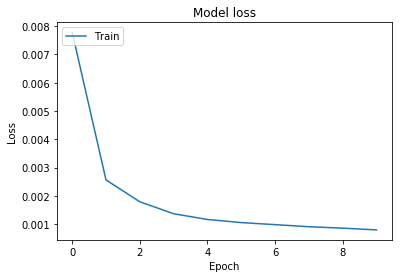

In [25]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Text(0.5, 0, 'Time')

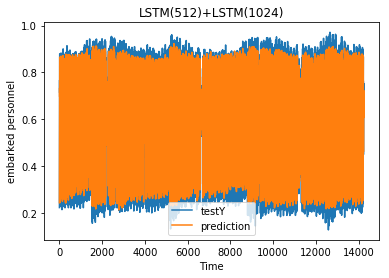

In [41]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'prediction'], loc='best')
plt.title('LSTM(512)+LSTM(1024)')
plt.ylabel('embarked personnel')
plt.xlabel('Time')

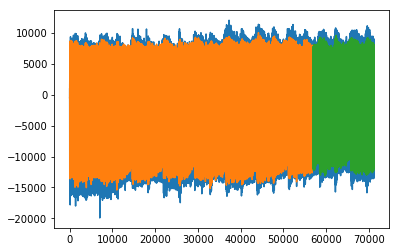

In [38]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_test])

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(data)+2, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [20]:
# from keras.models import model_from_json
# json_file = open("model.json", "r")
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# loaded_model.load_weights("model.h5")
# loaded_model.compile(loss="mean_squared_error", optimizer="rmsprop", metrics=['accuracy'])

In [21]:
from keras.utils import plot_model
plot_model(loaded_model, to_file='model.png')
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))
plot_model(loaded_model, to_file='model_plot.png')

NameError: name 'loaded_model' is not defined

In [ ]:
SVG(model_to_dot(loaded_model).create(prog='dot', format='svg'))

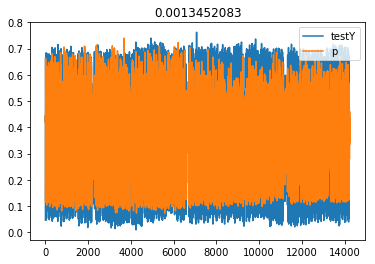

0.0013452083


In [22]:
plt.plot(y_test)
plt.plot(p)
plt.legend(['testY', 'p'], loc='upper right')
plt.title(mean_squared_error(y_test, p))
# plt.savefig(datetime.datetime.now())
plt.show()
print(mean_squared_error(y_test, p))